In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

In [8]:
data_ingest_folder = os.path.join('..', '00_data_ingest' )


cell_annotations_csv = os.path.join(data_ingest_folder, '18_global_annotation_csv', 'annotations_droplet.csv')
cell_annotations = pd.read_csv(cell_annotations_csv)
cell_annotations = cell_annotations.fillna("NA")
print(cell_annotations.shape)
cell_annotations.head()

(55656, 20)


/Users/olgabot/anaconda3/envs/tabula-muris-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cell,cell_ontology_class,cell_ontology_id,channel,cluster.ids,free_annotation,mouse.id,mouse.sex,subsetA,subsetA_cluster.ids,subsetB,subsetB_cluster.ids,subsetC,subsetC_cluster.ids,subsetD,subsetD_cluster.ids,subtissue,tissue,tissue_tSNE_1,tissue_tSNE_2
0,10X_P7_8_AAACGGGAGGATATAC,myeloid cell,CL:0000763,10X_P7_8,20,dendritic cells and interstital macrophages,3-F-56,F,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lung,17.024721,-32.902836
1,10X_P7_8_AAACGGGTCTCGTATT,alveolar macrophage,CL:0000583,10X_P7_8,5,NA,3-F-56,F,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lung,25.160619,25.066566
2,10X_P7_8_AAAGATGCAGATCTGT,B cell,CL:0000236,10X_P7_8,12,NA,3-F-56,F,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lung,1.740567,46.488878
3,10X_P7_8_AAATGCCAGATAGTCA,natural killer cell,CL:0000623,10X_P7_8,7,NA,3-F-56,F,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lung,-31.647934,-2.208061
4,10X_P7_8_AAATGCCCAAACTGCT,T cell,CL:0000084,10X_P7_8,21,NA,3-F-56,F,NA,NA,NA,NA,NA,NA,NA,NA,NA,Lung,-37.281266,-5.619565


In [9]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Bladder',
 'Heart_and_Aorta',
 'Kidney',
 'Limb_Muscle',
 'Liver',
 'Lung',
 'Mammary_Gland',
 'Marrow',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

width: 2.9921259842400003, height: 10.6299212598

--- Bladder ---

--- Heart_and_Aorta ---
"NA" in df["cell_ontology_class"]

--- Kidney ---

--- Limb_Muscle ---
"NA" in df["cell_ontology_class"]

--- Liver ---

--- Lung ---
"NA" in df["cell_ontology_class"]

--- Mammary_Gland ---

--- Marrow ---

--- Spleen ---

--- Thymus ---

--- Tongue ---

--- Trachea ---
"NA" in df["cell_ontology_class"]


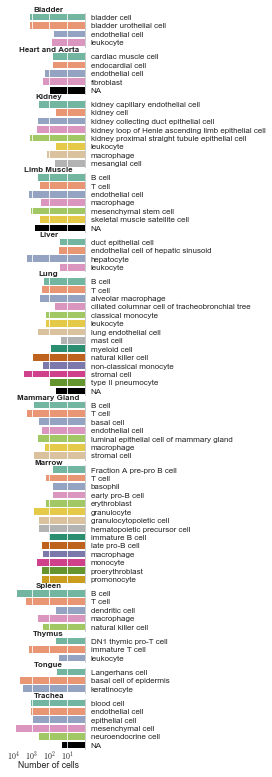

In [10]:
mm_to_inch = 0.03937007874

width = 76 * mm_to_inch
height = 270 * mm_to_inch

print(f'width: {width}, height: {height}')

col = 'cell_ontology_class'

height_ratios = cell_annotations.groupby('tissue').apply(lambda x: len(x[col].unique()))

fig, axes = plt.subplots(figsize=(width, height), nrows=len(tissues), sharex=True, 
                         gridspec_kw=dict(height_ratios=height_ratios))

def barplot(x, y, data, palette=None, ax=None, zorder=-1, title='', order=None):
    if order is None:
        order = sorted(data[y], key=lambda s: s.lower())
    
#     ax.set_xscale('log')
    sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax, zorder=zorder, order=order)
    ax.set(xlabel='', ylabel='')

    # Remove "FACS"
    title = title.replace('_FACS', '').replace('_', ' ')
    ax.set_title(title, va='top', fontweight='bold', size=8)
    
    ax.yaxis.set_ticks_position("right")

    # only y-axis grid
    ax.grid(axis='x', zorder=100, color='white')
    ax.grid('off', axis='y')
    
    ax.spines['left'].set_visible(False)

    if ax.is_last_row():
        xticks = list(range(1, max(map(int, ax.get_xticks()))))
        xticklabels = [f'$10^{int(i)}$' for i in xticks]
        ax.set_xlabel('Number of cells', va='center')
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels, va='center')
        ax.invert_xaxis()

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


palette = sns.color_palette('Set2', n_colors=8) + sns.color_palette('Dark2', n_colors=8) + sns.color_palette('Pastel2', n_colors=8)

for (tissue, df), ax in zip(cell_annotations.groupby('tissue'), axes):
    print(f'\n--- {tissue} ---')
    
    annotation_subannotation = df.groupby(col).size().reset_index()
    annotation_subannotation = annotation_subannotation.rename(columns={0: 'n_cells'})
    annotation_subannotation['log10_n_cells'] = np.log10(annotation_subannotation['n_cells'])
    
    categories = annotation_subannotation['cell_ontology_class'].unique()
    if "NA" in categories:
        print('"NA" in df["cell_ontology_class"]')
        # Make sure NA is always last and black

        categories = sorted(annotation_subannotation['cell_ontology_class'].replace('NA', np.nan).dropna().unique())
        
        # NA is always last category
        categories = categories + ['NA']
        annotation_subannotation['cell_ontology_class'] = pd.Categorical(
            annotation_subannotation['cell_ontology_class'], categories=categories, ordered=True)
        
        # Last category is black
        tissue_palette = palette[:(len(categories)-1)] + ['black']
    else:
        tissue_palette = palette
        categories = categories
    
    barplot(x='log10_n_cells', y=col, data=annotation_subannotation, palette=tissue_palette, 
            ax=ax, title=tissue, order=categories)
    
    # Plot each tissue's barplot on an individual figure - didn't end up using
#     tissue_height = height * (height_ratios[tissue]/height_ratios.sum()) + 1
#     fig_tissue, ax_tissue = plt.subplots(figsize=(width, tissue_height))
#     barplot('log10_n_cells', col, annotation_subannotation, palette, ax=ax_tissue, title=tissue)

#     left, right = -0.05, 1.04
#     bottom, top = -0.015, 1.01
#     fig_tissue.tight_layout(h_pad=-0.1, rect=[left, bottom, right, top])
#     fig_tissue.savefig(f'figure2c_barplot_n_cells_per_annotation_{tissue}.pdf')
    
            
        
 
left, right = -0.05, 1.24
bottom, top = -0.015, 1.01
fig.tight_layout(h_pad=-0.1, rect=[left, bottom, right, top])
fig.savefig('supplementary_figure5c_barplot_n_cells_per_annotation_all.pdf',bbox_inches="tight")
